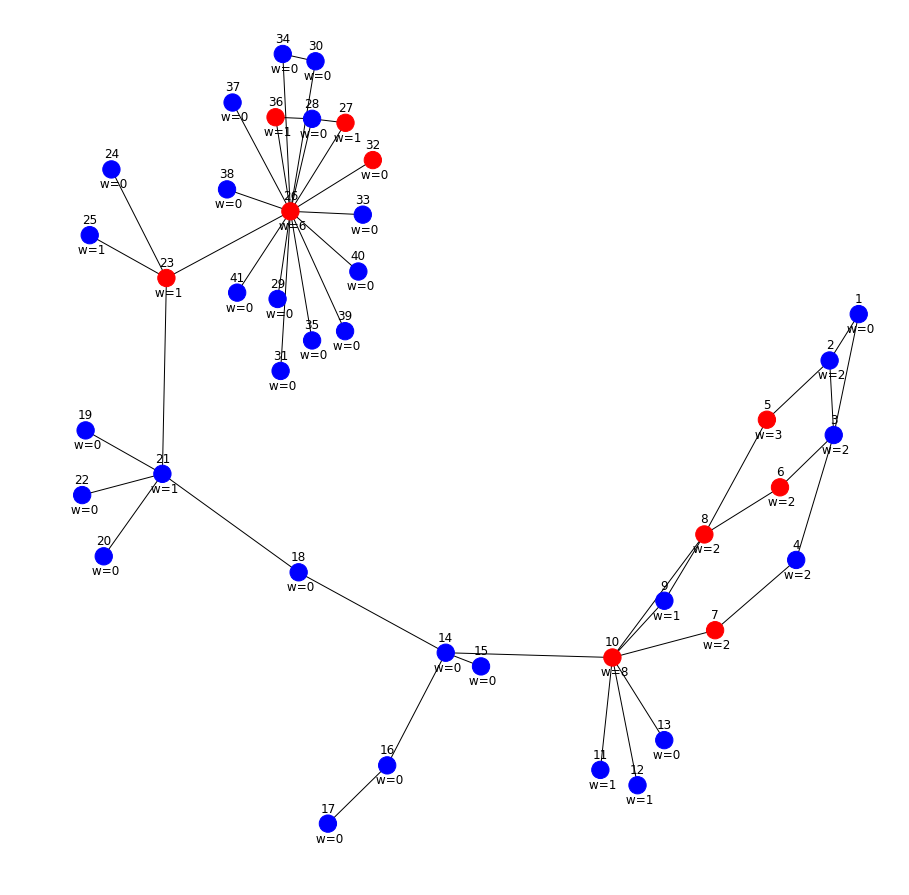

In [2]:
import sys
import matplotlib.pyplot as plt
import networkx as nx

#######################
#graph - adjacency
G = nx.Graph()
weights = [0, 2,2,2,3,2,2,2,1,8,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,6,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0];

for i in range(1,42):
    G.add_node(i, weight=weights[i-1])
    weights[2]
edge_links = [(1,2), (1,3), (2,3), (3, 4), (2, 5), (3, 6), (4, 7), (5, 8), (6, 8), (7, 10), (8,9), (8,10), (9, 10),
             (10, 11), (10, 12), (10, 13), (10, 14), (14, 15), (14, 16), (14, 18), (16, 17), (18, 21), (19, 21),
              (20, 21), (21, 22), (21,23), (23, 24), (23, 25), (23, 26),(26, 27), (26, 28), (26, 29), (26, 30,),
               (26, 31), (26, 32), (26, 33), (26, 34), (26, 35), (26, 36), (26, 37), (26, 38), (26, 39), (26, 40),
              (26, 41), (27, 28), (28, 36), (30, 34)]
G.add_edges_from(edge_links)
#######################
# node-color
color_map = ['blue'] * 41
indices = [4,5,6,7,9,22,25,26,31,35] #madams
for ind in indices:
    color_map[ind] = 'red'
#######################
#labels
labels = {
    n: str(n) + '\n\n w=' + str(G.nodes[n]['weight']) if 'weight' in G.nodes[n] else str(n)
    for n in G.nodes}
#done

plt.figure(3,figsize=(12,12))
nx.draw(G,node_color = color_map, with_labels=True,labels=labels)
plt.savefig('network.png')
plt.show()

In [58]:
# #following is for subset v() calculation not used anymore, uncomment all the cell to re-activate
# from itertools import combinations 
# import time as time


# a = []
# for i in range(2,6):
#     start_time = time.time()
#     comb = combinations(range(1,42), i) 
#     for j in list(comb):
#         a = list(j)
#         H = G.subgraph(a)
#         nx.number_connected_components(H)
#     elapsed_time = time.time() - start_time
#     print(elapsed_time)

0.021953105926513672
0.22837495803833008
2.6664345264434814
23.655396699905396


Next, we compute the Shapley approximation value. The formula is
$$ \hat{\varphi}_i (v) = \frac{1}{r} \sum_{\sigma \in \prod_i^a} m_v^{\sigma}(i)$$

In [29]:
#Calculate the Shapley value and v(.) value togehter, Herbet's heuristic
#create main permutations
import numpy as np
import math
n = 41; t = 250; r = n*t;
allArray = np.zeros((r,n), dtype=int)
for i in range(0,r): #go from 0 to r-1, since index of array starts from 0, be careful
    allArray[i] = np.random.permutation(range(1,n+1)) #permutation stays from 1 to 41
allArray

array([[13, 27,  5,  1, 30,  2, 12,  6, 37, 22,  4, 23, 24, 14, 18, 41,
        11, 33, 29,  7, 10, 20, 31, 19,  8, 40, 15, 21, 38, 34, 35, 16,
         9, 17, 26, 28,  3, 25, 32, 39, 36],
       [35, 38, 23, 28, 33,  2, 40, 11, 39,  5, 19, 15, 13,  6, 22, 12,
        32,  3, 10, 24, 14, 20, 16, 30,  1, 25, 21,  7, 18, 31, 36,  4,
         9, 27, 34, 17, 29, 37, 41, 26,  8],
       [26, 17, 18, 37,  5, 19,  6, 31, 36,  3, 16, 23, 11,  9, 38,  2,
        33, 15, 14, 10,  7, 30, 22, 34, 27, 24, 28, 39, 12,  4, 25, 35,
        32, 13, 41,  1,  8, 21, 40, 29, 20],
       [18, 39, 12, 26, 33, 38, 40,  4,  9,  7, 22, 19, 25,  8, 35, 32,
         1, 29,  3, 23, 34, 13, 31, 10, 20, 21, 30, 17,  5,  6, 36, 27,
        15, 41, 28, 16, 24, 14, 11, 37,  2],
       [22,  8, 38, 19, 16, 24, 14,  2, 26, 21, 34, 27, 37,  1, 39, 23,
         7,  6, 32, 10, 33, 11, 30, 25, 13, 28,  4, 17,  3, 40, 35,  5,
        29, 15, 18, 31,  9, 36, 12, 41, 20],
       [ 5, 16, 32, 36, 11,  1, 12,  7,  6, 14, 18, 23,

In [4]:
def approxim(dummy, group, weights,graph): #function which calculates v(S) - V(S/lastindex)
    player=  dummy[group]
    if group == 0:
        return weights[player-1]
    else:
        sub_dummy = dummy[0:group+1]
        H = graph.subgraph(list(sub_dummy))
        a =  nx.connected_components(H)
        comps = []
        for c in a:
            summ = 0
            for vertex in c:
                summ = summ + weights[vertex - 1]
            comps.append(summ)
        with_S = max(comps)
        if group ==1:
            without_S = weights[dummy[0] - 1]
        else:
            sub_dummy = dummy[0:group]
            H = graph.subgraph(list(sub_dummy))
            a =  nx.connected_components(H)
            comps = []
            for c in a:
                summ = 0
                for vertex in c:
                    summ = summ + weights[vertex - 1]
                comps.append(summ)
            without_S = max(comps)
        return (with_S - without_S)

In [30]:
#iterate for players
import math
import time
start_time = time.time()
n = 41; t = 250; r = n*t;
marginal = np.zeros((n,r), dtype = int)  #keep all the marginal values
for i in range(1,n+1): #for all players
    for z in range(0,r): #for all random permutations
        j = math.floor(z/t) #group number in the current iteration
        dummy = allArray[z] #take the corresponding row of all permutations
        index_player_i = np.where(dummy == i)[0][0] #index of our current player
        temp = dummy[j] #store the location which will be changed
        dummy[index_player_i] = temp
        dummy[j] = i
        marginal[i-1,z] = approxim(dummy, j, weights, G)
ar = np.mean(marginal, axis=1)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
aras1 = np.sort(ar) #sort
aras2 = np.argsort(ar) + 1 #index sorted, plus one makes index 0 -> 1, 1 -> 2, ...
elapsed_time = time.time() - start_time
print(elapsed_time)

100.52454566955566


In [32]:
aras2 #sorted nodes

array([ 1, 39, 38, 37, 35, 34, 33, 32, 31, 30, 29, 24, 22, 40, 20, 19, 41,
       16, 15, 13, 17, 28, 25, 36, 27, 11, 12,  9,  2,  6,  4, 14, 18,  3,
       23,  7, 21,  5, 26,  8, 10], dtype=int64)

In [34]:
aras1 #Shapley values

array([0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
       0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
       0.000, 0.000, 0.000, 0.001, 0.296, 0.319, 0.319, 0.556, 0.556,
       0.665, 1.399, 1.491, 1.701, 1.917, 1.921, 1.939, 1.946, 2.027,
       2.033, 2.167, 3.080, 3.109, 9.641])